## Read data
Opening and reading the data from the COCTAILL corpus.

In [1]:
data_path = "../data/"

### Exclude stop words

In [2]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words= stopwords.words('swedish')

print(stop_words)

['och', 'det', 'att', 'i', 'en', 'jag', 'hon', 'som', 'han', 'på', 'den', 'med', 'var', 'sig', 'för', 'så', 'till', 'är', 'men', 'ett', 'om', 'hade', 'de', 'av', 'icke', 'mig', 'du', 'henne', 'då', 'sin', 'nu', 'har', 'inte', 'hans', 'honom', 'skulle', 'hennes', 'där', 'min', 'man', 'ej', 'vid', 'kunde', 'något', 'från', 'ut', 'när', 'efter', 'upp', 'vi', 'dem', 'vara', 'vad', 'över', 'än', 'dig', 'kan', 'sina', 'här', 'ha', 'mot', 'alla', 'under', 'någon', 'eller', 'allt', 'mycket', 'sedan', 'ju', 'denna', 'själv', 'detta', 'åt', 'utan', 'varit', 'hur', 'ingen', 'mitt', 'ni', 'bli', 'blev', 'oss', 'din', 'dessa', 'några', 'deras', 'blir', 'mina', 'samma', 'vilken', 'er', 'sådan', 'vår', 'blivit', 'dess', 'inom', 'mellan', 'sådant', 'varför', 'varje', 'vilka', 'ditt', 'vem', 'vilket', 'sitta', 'sådana', 'vart', 'dina', 'vars', 'vårt', 'våra', 'ert', 'era', 'vilkas']


[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusihaliel@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Open and read the XML files

In [10]:
import os
import re
import xml.etree.ElementTree as ET 
from xml.etree.ElementTree import tostring
from itertools import chain

data = {}
all_genres = {}

path = data_path+'COCTAILL-full'
count = 0
for filename in os.listdir(path):   
    # only parse xml files 
    if not filename.endswith('.xml'): continue
    print(filename)
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)
    root = tree.getroot() 
    all_name_elements = root.findall('.//lessontext')  
    
    for elem in all_name_elements:
        count +=1
        
        # some texts might not have genre
        try:
            genres = elem.attrib['genre'] #genre/s       
        except KeyError: 
            genres = "none"
            
        #genres =re.sub(r'(\|)', ' ', genres) 
        #genres =re.sub(r'(?<=\w)(\|)(?=\w)', ' ', genres) 
        #genres =re.sub(r'(?<=\w)(\| | \/)(?=\w)', ' ', genres) 
        #genres =re.sub(r'(\|)', '', genres) 
        #genres =re.sub(r'(\|)', ' ', genres)
        # split into lists
        
        genres= genres.split("|")
        #
        #genres = [i.split('/') for i in genres]
        # unnest the lists
        #genres=list(chain.from_iterable(genres)) 
        # remove empty items
        genres = list(filter(None, genres))
        # remove duplicates
        #genres = list(dict.fromkeys(genres))
        print(genres)
        
        
        notags = ET.tostring(elem, encoding='unicode', method='text')              
        # replace abbverbiatons
        notags = notags.replace("dvs.","det vill säga")
        notags = notags.replace("t.ex.","till exempel")
        notags = notags.replace("f.kr.","före kristus")
        notags = notags.replace("e.kr.","efter kristus") 
        notags = notags.replace("bl.a.","bland annat") 
        notags = notags.replace("nr.","nummer") 
        notags = notags.replace("resp.","respektive") 
        # some misspellings...
        notags = notags.replace("biblotekarien","bibliotekarien") 
        
        # remove wierd characters and numbers
        notags = re.sub(r'([\-\_\^\«\:\,\¬\.\%\+\=\/\(\)\"\*\°]|[0-9])', ' ', notags)  
        # remove unnecessary whitespaces
        notags = re.sub(r'(\s{2,}|\n)', ' ', notags)  
        # lowercase the words
        notags = notags.lower()
        
        #print(count, genres)
        
        data[count] = {
            "genre":genres,
            "sentences":notags
        }
        for g in genres:
            if g in all_genres:
                all_genres[g] += 1
            else:
                all_genres[g] = 1

nya_mal_1.xml
['other/dialogue']
['facts/facts']
['other/letter']
['narration/description']
['narration/fiction']
['other/dialogue']
['facts/geographical facts']
['narration/description']
['narration/fiction']
['other/dialogue']
['narration/description']
['other/dialogue']
['facts/facts']
['narration/fiction']
['narration/fiction', 'other/dialogue']
['facts/geographical facts', 'narration/description']
['other/dialogue']
['facts/facts', 'facts/geographical facts']
['narration/description', 'narration/fiction']
['other/dialogue']
['other/dialogue']
['other/dialogue']
['other/dialogue']
['facts/geographical facts']
['narration/description']
['narration/description']
['other/dialogue']
['other/dialogue']
['facts/facts']
['other/dialogue', 'narration/fiction']
['other/dialogue', 'narration/fiction']
['other/dialogue']
['other/dialogue']
['other/dialogue']
['narration/personal story', 'narration/fiction']
['other/language tip']
['other/dialogue']
['facts/facts']
['other/notice']
['other/dia

### Look at the text and genres

In [16]:
import pprint
import random

data_example = random.choice(list(data.items()))

pprint.pprint(data_example)
#pprint.pprint(data)

(334,
 {'genre': ['evaluation/personal reflection'],
  'sentences': ' alla som börjar studera ett nytt språk har olika idéer om hur '
               'man bäst lär in ord uttal och grammatiska strukturer man vill '
               'ju så snabbt som möjligt kunna använda sitt nya språk så här '
               'svarade några svenskstuderande när vi frågade vilka knep de '
               'har bibi jag skriver listor med ord det svenska ordet till '
               'vänster och det tyska till höger sen viker jag papperet på '
               'mitten och översätter fram och tillbaka jag lär mig bäst när '
               'jag lyssnar på musik pavel jag lyssnar mycket på svensk radio '
               'på språkets melodi sen härmar jag språket som en papegoja ett '
               'språk är inte bara nya ord lolo grammatiken är viktigast för '
               'mig jag måste förstå skillnaden mellan olika språk jag älskar '
               'att göra grammatiska övningar särskilt verbövningar det borde

### Using NLPL Models In-Situ
To avoid data duplication, it is recommended to load models (resulting sets of word vectors) from the NLPL repository directly from the NLPL project directory, when working on Saga or Taito. Repository entries are uniformly packaged as .zip compressed archives, but the uniform naming scheming makes it possible to directly read one or more of the model files from the archive.

Each repository entry (i.e. set of word vectors, or 'model') is packaged in the form of a .zip archive, with uniform conventions for file naming inside the file, using the model.txt and model.bin entries for the actual vectors. Each archive includes the relevant excerpts from the catalogue as a file meta.json to help identify the specific contents; a README file included with each model entry provides a life-time unique identifier, e.g. http://vectors.nlpl.eu/repository/20/3.zip for model #3 in the 2.0 release of the repository.

In [17]:
import zipfile
import gensim

model_69 = "69.zip" # Word2Vec Continuous Skipgram
model_173 = "173.zip" # Embeddings from Language Models (ELMo)

repository = data_path
with zipfile.ZipFile(repository + model_69, "r") as archive:
    stream = archive.open("model.txt")
    # In Python, something along the following lines should work to iterate over all of the entries in the model
    #for line in stream:
    
    # Alternatively, if working in a framework like gensim
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=False, unicode_errors='replace')
    #model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True, unicode_errors='replace')
    
    # Binary fastText models (stored as parameters.bin files) should be first extracted 
    # from the .zip archive, and then loaded with
    # model = gensim.models.fasttext.load_facebook_vectors("parameters.bin")

Check for out of vocabulary words.

In [18]:
import numpy as np
oov_words = {}

def get_w2v_vectors(model, word):
    try:
        vec = model.word_vec(word)
    # this exception will occur when a word does not exist in the vocabulary of this model
    except KeyError:        
        print("{} does not exists in the model ".format(word))
        vec = np.random.rand(1,300)[0]
        if word in oov_words:
            oov_words[word] += 1
        else:
            oov_words[word] = 1
    return vec

### Load the word vector model
Load the model and check which words are not in the model, and remove stop words.

In [19]:
import nltk.data

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from nltk.tokenize import WhitespaceTokenizer

tokenizer = nltk.data.load('tokenizers/punkt/swedish.pickle') # use this to tokenize whole sentences

word_vectors = {}

for n, sent_and_genres in data.items():
    #print(n)
    genres = sent_and_genres['genre']
    sentences = sent_and_genres['sentences']
    #print(sentences)
    

    #tokenized_text = tokenizer.tokenize(sentence)        
    tokenized_text = WhitespaceTokenizer().tokenize(sentences)  
    tokenized_text = list(filter(None, tokenized_text))
    #print(tokenized_text)
    # remove stop words
    #tokenized_text = [word for word in tokenized_text if not word in stop_words]       

    for word in tokenized_text:
        #print(word)
        # check if the word is not in the model
        #if not word in word_vectors: continue
        vec = get_w2v_vectors(model,word)
        word_vectors[word] = vec

sjuttien does not exists in the model 
taxiparkering does not exists in the model 
jaog does not exists in the model 
ahlblad does not exists in the model 
rioteatern does not exists in the model 
ahlblad does not exists in the model 
rioteatern does not exists in the model 
uppslagsform does not exists in the model 
celsiustermometern does not exists in the model 
roxetteskivor does not exists in the model 
ordfattigt does not exists in the model 
fågeldräkt does not exists in the model 
tapetmålare does not exists in the model 
hedersfru does not exists in the model 
lundeli does not exists in the model 
havsmusik does not exists in the model 
tidskriftsavdelning does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
deckarakademiens does not exists in the model 
portierlogen does not exists 

In [20]:
print(f'Number of OOV words: {len(oov_words)}')

Number of OOV words: 1042


In [21]:
print(f'Total words: {len(oov_words)+len(word_vectors)}')

Total words: 26952


### Make sure not too many words are out of vocabulary

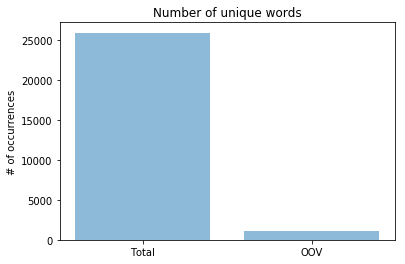

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('Total', 'OOV')
y_pos = np.arange(len(objects))
performance = [len(word_vectors), len(oov_words)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# of occurrences')
plt.title('Number of unique words')

plt.show()

In [25]:
missing = round(len(oov_words)/len(word_vectors)*100)
print(f'Percentage of missing words: {missing}%')

Percentage of missing words: 4%


## Genres

In [26]:
unique_genres={k: v for k, v in sorted(all_genres.items(), reverse=True, key=lambda item: item[1])}
print(unique_genres)
print(len((unique_genres)))

{'narration/description': 237, 'other/dialogue': 209, 'facts/facts': 100, 'narration/personal story': 95, 'other/language tip': 91, 'facts/biography': 67, 'facts/historical facts': 66, 'evaluation/personal reflection': 64, 'narration/news article': 56, 'narration/fiction': 53, 'facts/explanation': 49, 'other/letter': 41, 'other/lyrics': 39, 'facts/instruction': 37, 'facts/geographical facts': 36, 'other/quotation': 23, 'facts/report': 23, 'facts/procedures': 21, 'other/anecdote': 21, 'evaluation/advertisement': 13, 'other/questionnaire': 12, 'other/notice': 10, 'none': 9, 'evaluation/argumentation': 7, 'other/poem': 7, 'facts/rules': 5, 'evaluation/discussion': 4, 'other/recipe': 3, 'evaluation/exposition': 2, 'facts/autobiography': 2, 'evaluation/argumentation, facts/report': 2, 'other/rhyme': 2, 'facts/demonstration': 1, 'evaluation/review': 1, 'facts/news article': 1, 'evaluation/persuasion': 1}
36


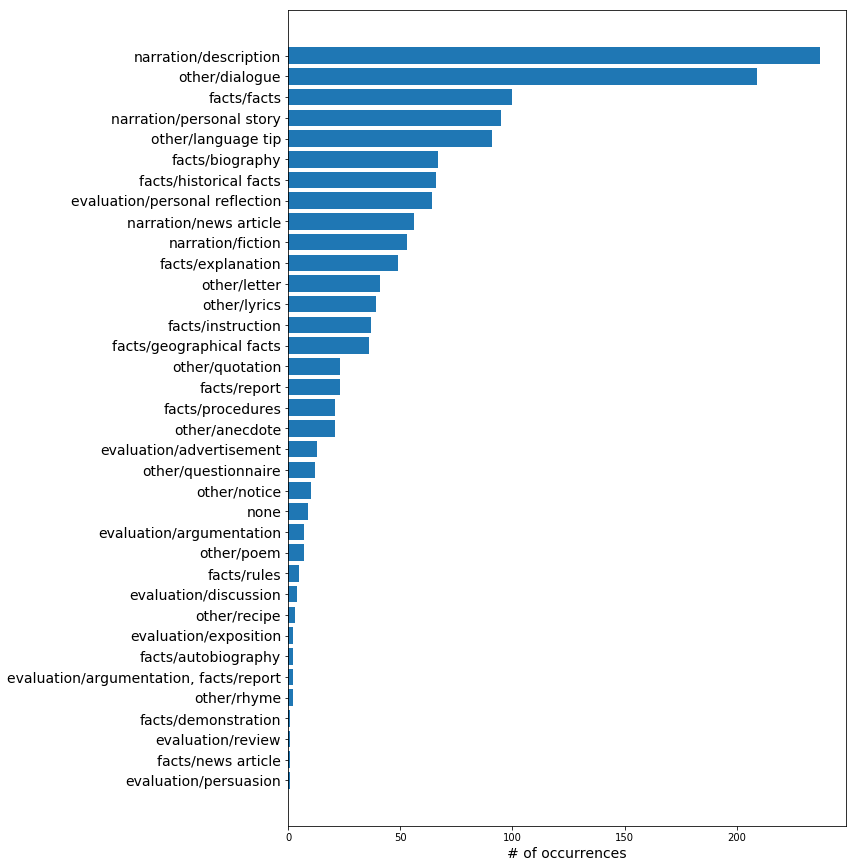

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
            
fig, ax = plt.subplots(figsize=(10,15))
ax.figsize=(40,40)

people = list(unique_genres.keys())
y_pos = np.arange(len(people))
performance = list(unique_genres.values())

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of occurrences', fontsize=14)

plt.show()

## Split data
Data is split into sets of 60/20/20 train/validation/testing.

In [15]:
len(data)

1120

In [16]:
totalindices = list(range(len(data)))

In [17]:
import random
import math

random.shuffle(totalindices)
splitindex = math.floor(len(data)*0.6)

In [18]:
splitindex

672

In [19]:
trainingindices = totalindices[:splitindex]
testingindices_ = totalindices[splitindex:]

In [20]:
splitindex2 = math.floor(len(testingindices_)*0.5)

In [21]:
splitindex2

224

In [22]:
testingindices = testingindices_[:splitindex2]
validationindices = testingindices_[splitindex2:]

In [23]:
print(f'Number of training examples: {len(trainingindices)}')
print(f'Number of validation examples: {len(validationindices)}')
print(f'Number of testing examples: {len(testingindices)}')

Number of training examples: 672
Number of validation examples: 224
Number of testing examples: 224


###  